In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr, spearmanr

In [ ]:
data = pd.read_csv('Netflix Userbase.csv')

In [ ]:
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [ ]:
data

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
data.shape

(2500, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
data["Join Date"] = pd.to_datetime(data["Join Date"])
data["Last Payment Date"] = pd.to_datetime(data["Last Payment Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [ ]:
count_ = data["Subscription Type"].value_counts()
count_

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

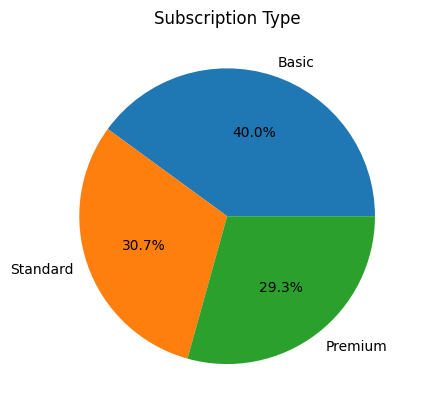

In [ ]:
#pie chart
plt.pie(count_, labels=count_.index, autopct='%1.1f%%')
plt.title("Subscription Type")
plt.show

In [ ]:
# Plan Duration
data['subscription duration'] = data['Last Payment Date'] - data ['Join Date']
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,subscription duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629 days
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262 days
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174 days


In [ ]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['Subscription Type', 'Country'], **{})
chart

In [ ]:
# Churn Analysis
current_date = pd.to_datetime('2023-07-04')
data['churned'] = (current_date - data['Last Payment Date']).dt.days>30
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,subscription duration,churned
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629 days,False
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774 days,False
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days,False
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262 days,False
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174 days,False


In [ ]:
data["churned"].value_counts()

False    1837
True      663
Name: churned, dtype: int64

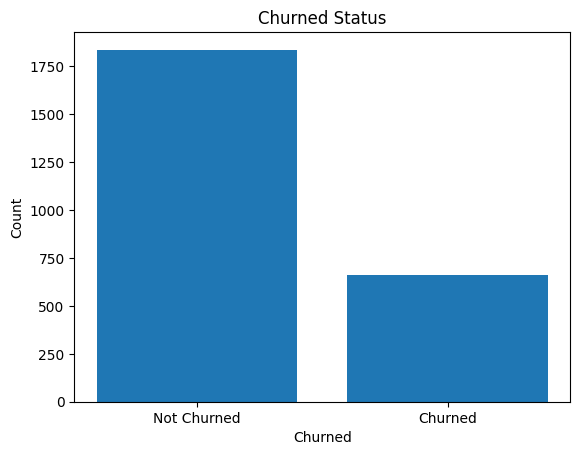

In [ ]:
value_counts = data["churned"].value_counts()

# bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Churned")
plt.ylabel("Count")
plt.title("Churned Status")
plt.xticks(value_counts.index, labels=["Not Churned", "Churned"])

# Show the plot
plt.show()


In [ ]:
# Customer Lifetime Value
data['clv'] = (data['Last Payment Date'] - data['Join Date']).dt.days * data['Monthly Revenue']
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,subscription duration,churned,clv,start month,renewal period
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629 days,False,6290,1,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774 days,False,11610,5,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days,False,1428,2,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262 days,False,3144,10,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174 days,False,1740,1,174


In [ ]:
def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Monthly Revenue'], **{})
chart

In [ ]:
# Seasonal Trends
data['start month'] = data['Join Date'].dt.month
start_month_counts = data['start month'].value_counts()

print(start_month_counts)

10    418
7     396
6     338
9     306
8     296
5     135
11    122
4     108
3     103
12     98
2      92
1      88
Name: start month, dtype: int64


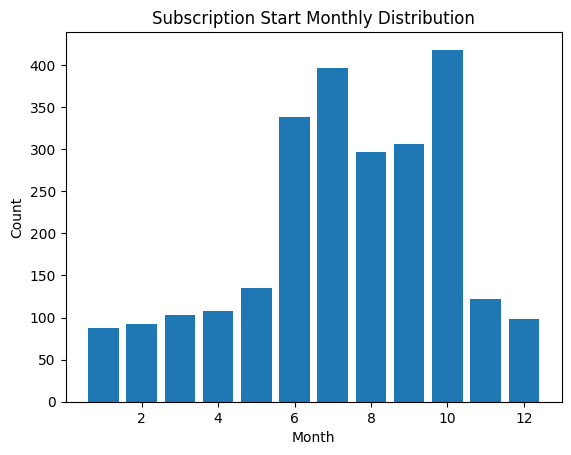

In [ ]:
start_month_counts = start_month_counts.sort_index()

# bar chart
plt.bar(start_month_counts.index, start_month_counts)

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Subscription Start Monthly Distribution")

plt.show()

In [ ]:
# Subscription Renewal Rates
data['renewal period'] = (data['Last Payment Date'] - data['Join Date']).dt.days
renewal_counts = data['renewal period'].value_counts()

total_subscriptions = len(data)
print("Total Subscription : ", total_subscriptions)

renewal_rates = (renewal_counts / total_subscriptions) * 100
renewal_rates

Total Subscription :  2500


422    1.08
391    1.00
392    0.92
361    0.88
334    0.80
       ... 
58     0.04
52     0.04
49     0.04
100    0.04
467    0.04
Name: renewal period, Length: 481, dtype: float64

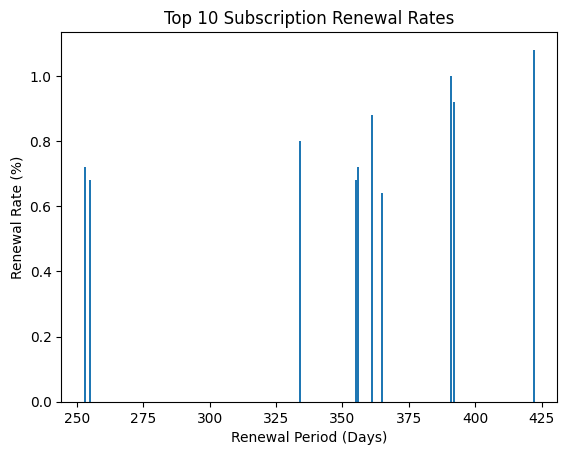

In [ ]:
top_10_renewal_rates = renewal_rates.sort_values(ascending=False).head(10)

plt.bar(top_10_renewal_rates.index, top_10_renewal_rates)

plt.xlabel("Renewal Period (Days)")
plt.ylabel("Renewal Rate (%)")
plt.title("Top 10 Subscription Renewal Rates")
plt.show()